In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox


In [3]:
import yfinance as yf

ticker = "^NSEI"
df = yf.download(
    ticker,
    start="2015-01-01",
    end="2024-12-31",
    progress=False
)

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df = df[["Close"]].rename(columns={"Close": "Price"})

df["log_return"] = np.log(df["Price"] / df["Price"].shift(1))
returns = df["log_return"].dropna()

/tmp/ipython-input-3553912098.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(


In [4]:
returns

,log_return
Date,
2015-01-05,-0.002033
2015-01-06,-0.030422
2015-01-07,-0.003112
2015-01-08,0.016221
2015-01-09,0.006042
...,...
2024-12-23,0.007011
2024-12-24,-0.001087
2024-12-26,0.000950


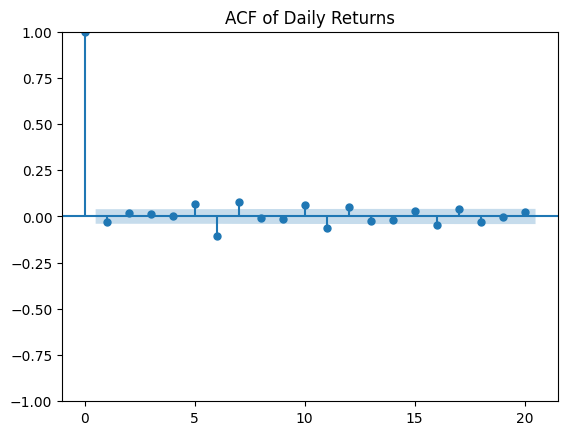

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(returns, lags=20)
plt.title("ACF of Daily Returns")
plt.show()

In [6]:
ar1 = ARIMA(returns, order=(1,0,0))
ar1_res = ar1.fit()

print(ar1_res.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                 2457
Model:                 ARIMA(1, 0, 0)   Log Likelihood                7699.289
Date:                Sat, 20 Dec 2025   AIC                         -15392.578
Time:                        09:56:49   BIC                         -15375.158
Sample:                             0   HQIC                        -15386.248
                               - 2457                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.939      0.053   -4.62e-06       0.001
ar.L1         -0.0284      0.011     -2.606      0.009      -0.050      -0.007
sigma2         0.0001   1.22e-06     91.422      0.0

In [7]:
arma11 = ARIMA(returns, order=(1,0,1))
arma11_res = arma11.fit()

print(arma11_res.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                 2457
Model:                 ARIMA(1, 0, 1)   Log Likelihood                7699.439
Date:                Sat, 20 Dec 2025   AIC                         -15390.878
Time:                        09:57:15   BIC                         -15367.651
Sample:                             0   HQIC                        -15382.438
                               - 2457                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.855      0.064   -2.36e-05       0.001
ar.L1         -0.2232      0.239     -0.932      0.351      -0.692       0.246
ma.L1          0.1942      0.243      0.798      0.4

In [14]:
# 1. Raw returns
#acorr_ljungbox(returns, lags=[10, 20], return_df=True)

# 2. ARMA residuals
#acorr_ljungbox(arma11_res.resid, lags=[10, 20], return_df=True)

# 3. Squared returns
acorr_ljungbox(returns**2, lags=[10, 20], return_df=True)

,lb_stat,lb_pvalue
10,1507.187799,0.0
20,1703.833087,0.0


In [16]:
from statsmodels.tsa.stattools import acf
acf_vals = acf(returns, nlags=20)
acf_vals

array([ 1.        , -0.02835469,  0.01814719,  0.01497048,  0.00488071,
        0.06885759, -0.10638009,  0.076472  , -0.01034886, -0.01279844,
        0.06054258, -0.06287427,  0.05298277, -0.02428545, -0.02070556,
        0.02778237, -0.04719904,  0.04020739, -0.03219519, -0.00125604,
        0.02582332])

Ljung–Box tests applied to raw returns and ARMA residuals indicate statistical
rejection due to the large sample size, although autocorrelations are small and
economically negligible. In contrast, Ljung–Box tests on squared returns strongly
reject the null hypothesis with extremely large test statistics, providing
overwhelming evidence of volatility clustering and conditional heteroskedasticity.
